In [58]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

%matplotlib inline


statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


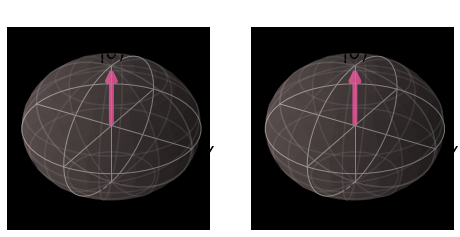

In [59]:
circuit = q.QuantumCircuit(2,2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


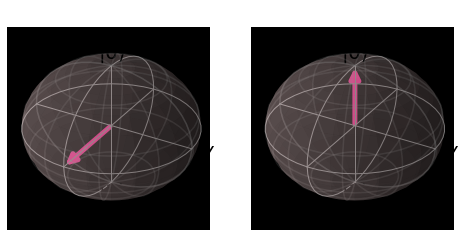

In [60]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)

statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


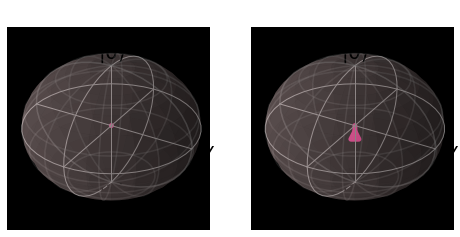

In [61]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
circuit.cx(0,1)  # controlled not control: 0 target: 1
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

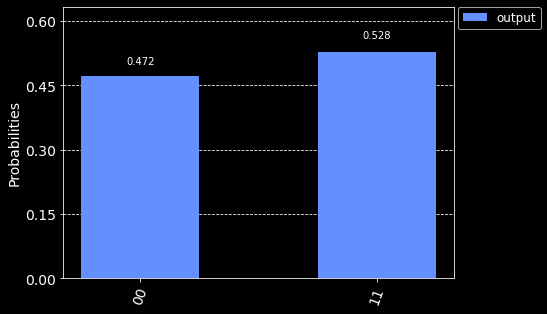

In [63]:
style.use("dark_background")
plot_histogram([counts], legend=['output'])

In [64]:
circuit = q.QuantumCircuit(3,3)  # 2 qubits, 2 classical bits 
circuit.h(0)
circuit.h(1)
circuit.cx(0,2)
circuit.cx(1,2)
circuit.draw()

┌───┐          
q_0: ┤ H ├──■───────
     ├───┤  │       
q_1: ┤ H ├──┼────■──
     └───┘┌─┴─┐┌─┴─┐
q_2: ─────┤ X ├┤ X ├
          └───┘└───┘
c: 3/═══════════════

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


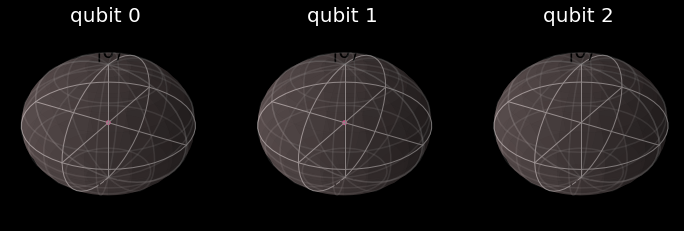

In [65]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

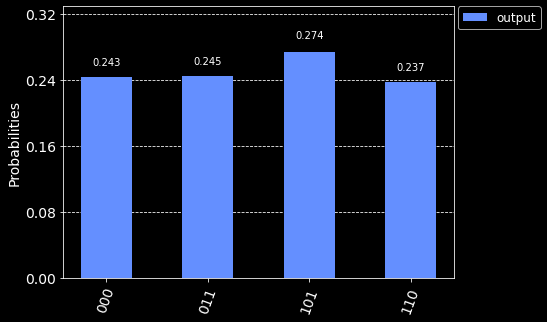

In [66]:
plot_histogram([counts], legend=['output'])

In [67]:
circuit = q.QuantumCircuit(3,3)  # 3 qubits, 3 classical bits 
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()


┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


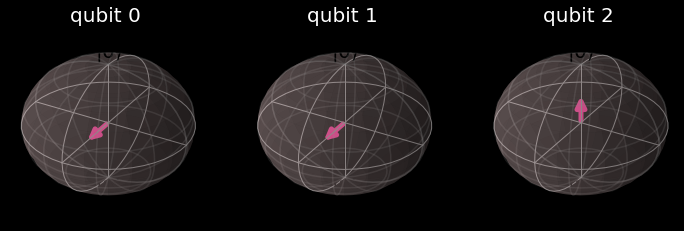

In [68]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

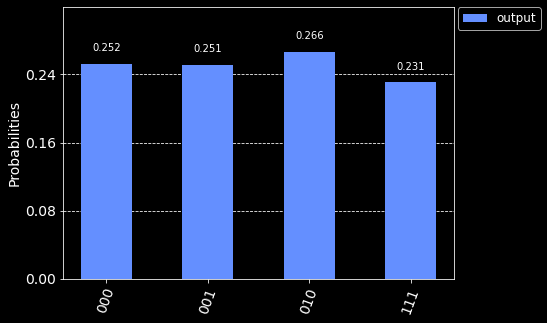

In [69]:
plot_histogram([counts], legend=['output'])

In [71]:
circuit = q.QuantumCircuit(3,1)  # 3 qubits, only 1 classical bit
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 1/══════════

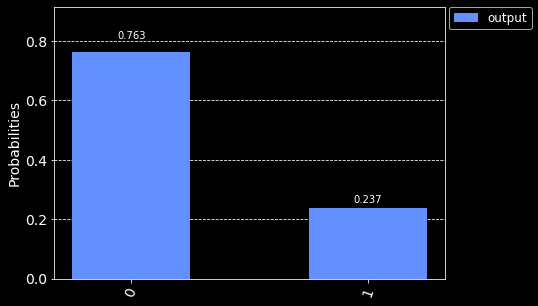

In [72]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


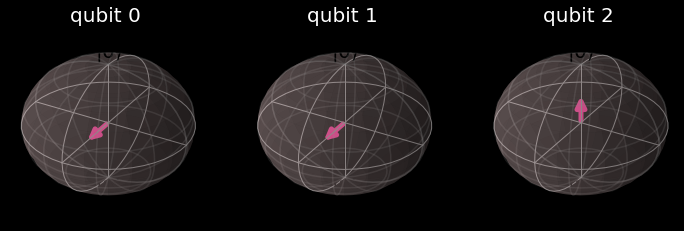

In [75]:
import math

circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


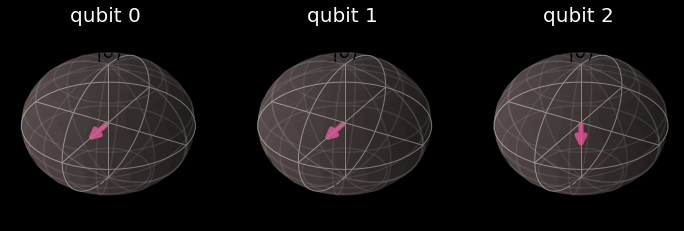

In [76]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


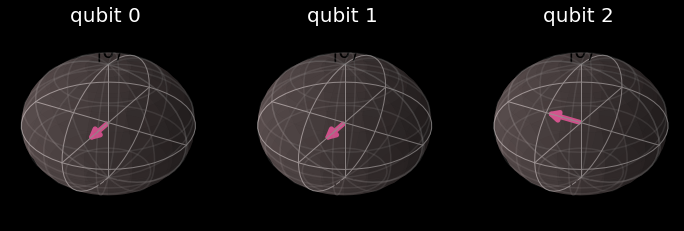

In [77]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

In [79]:
circuit = q.QuantumCircuit(3,3) 
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)
circuit.draw()

┌───┐                 
q_0: ┤ H ├──■──────────────
     ├───┤  │              
q_1: ┤ H ├──■──────────────
     └───┘┌─┴─┐┌──────────┐
q_2: ─────┤ X ├┤ RX(pi/2) ├
          └───┘└──────────┘
c: 3/══════════════════════

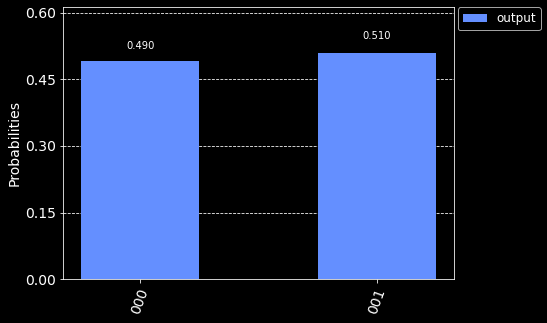

In [80]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


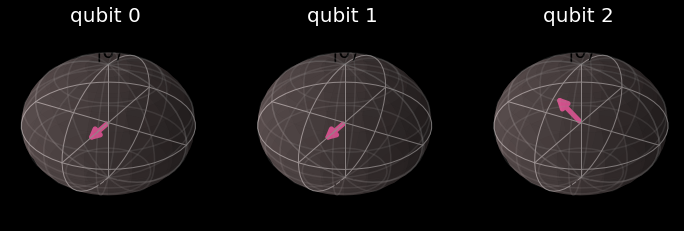

In [81]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

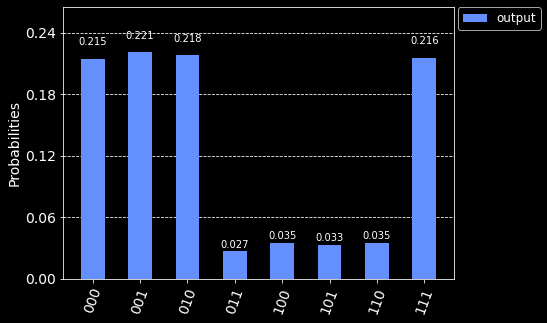

In [82]:
plot_histogram([counts], legend=['output'])

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


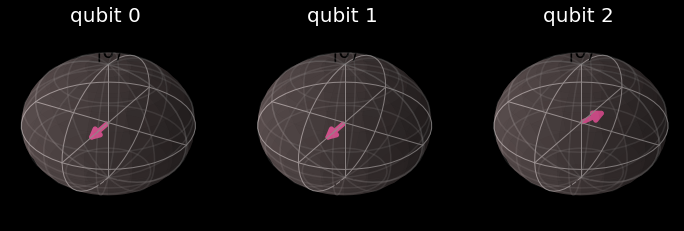

In [83]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

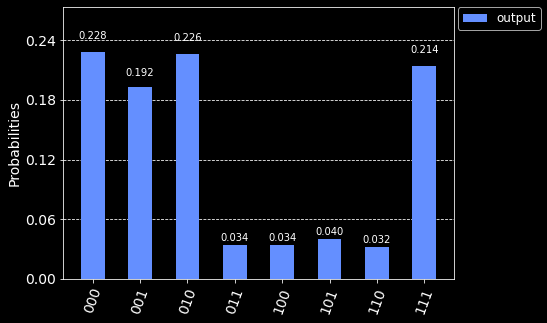

In [84]:
plot_histogram([counts], legend=['output'])

/Users/yonzhn/miniconda3/envs/quantum/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.


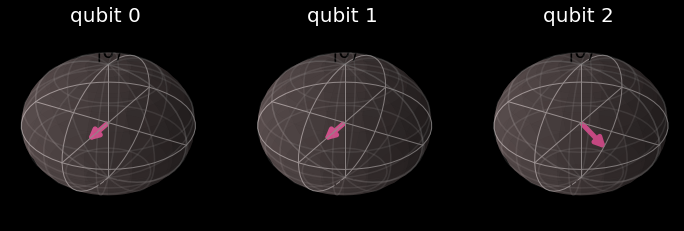

In [85]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

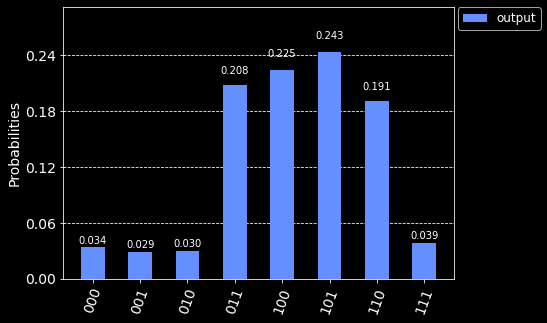

In [86]:
plot_histogram([counts], legend=['output'])